Loaded full LHS sample with 200 points.


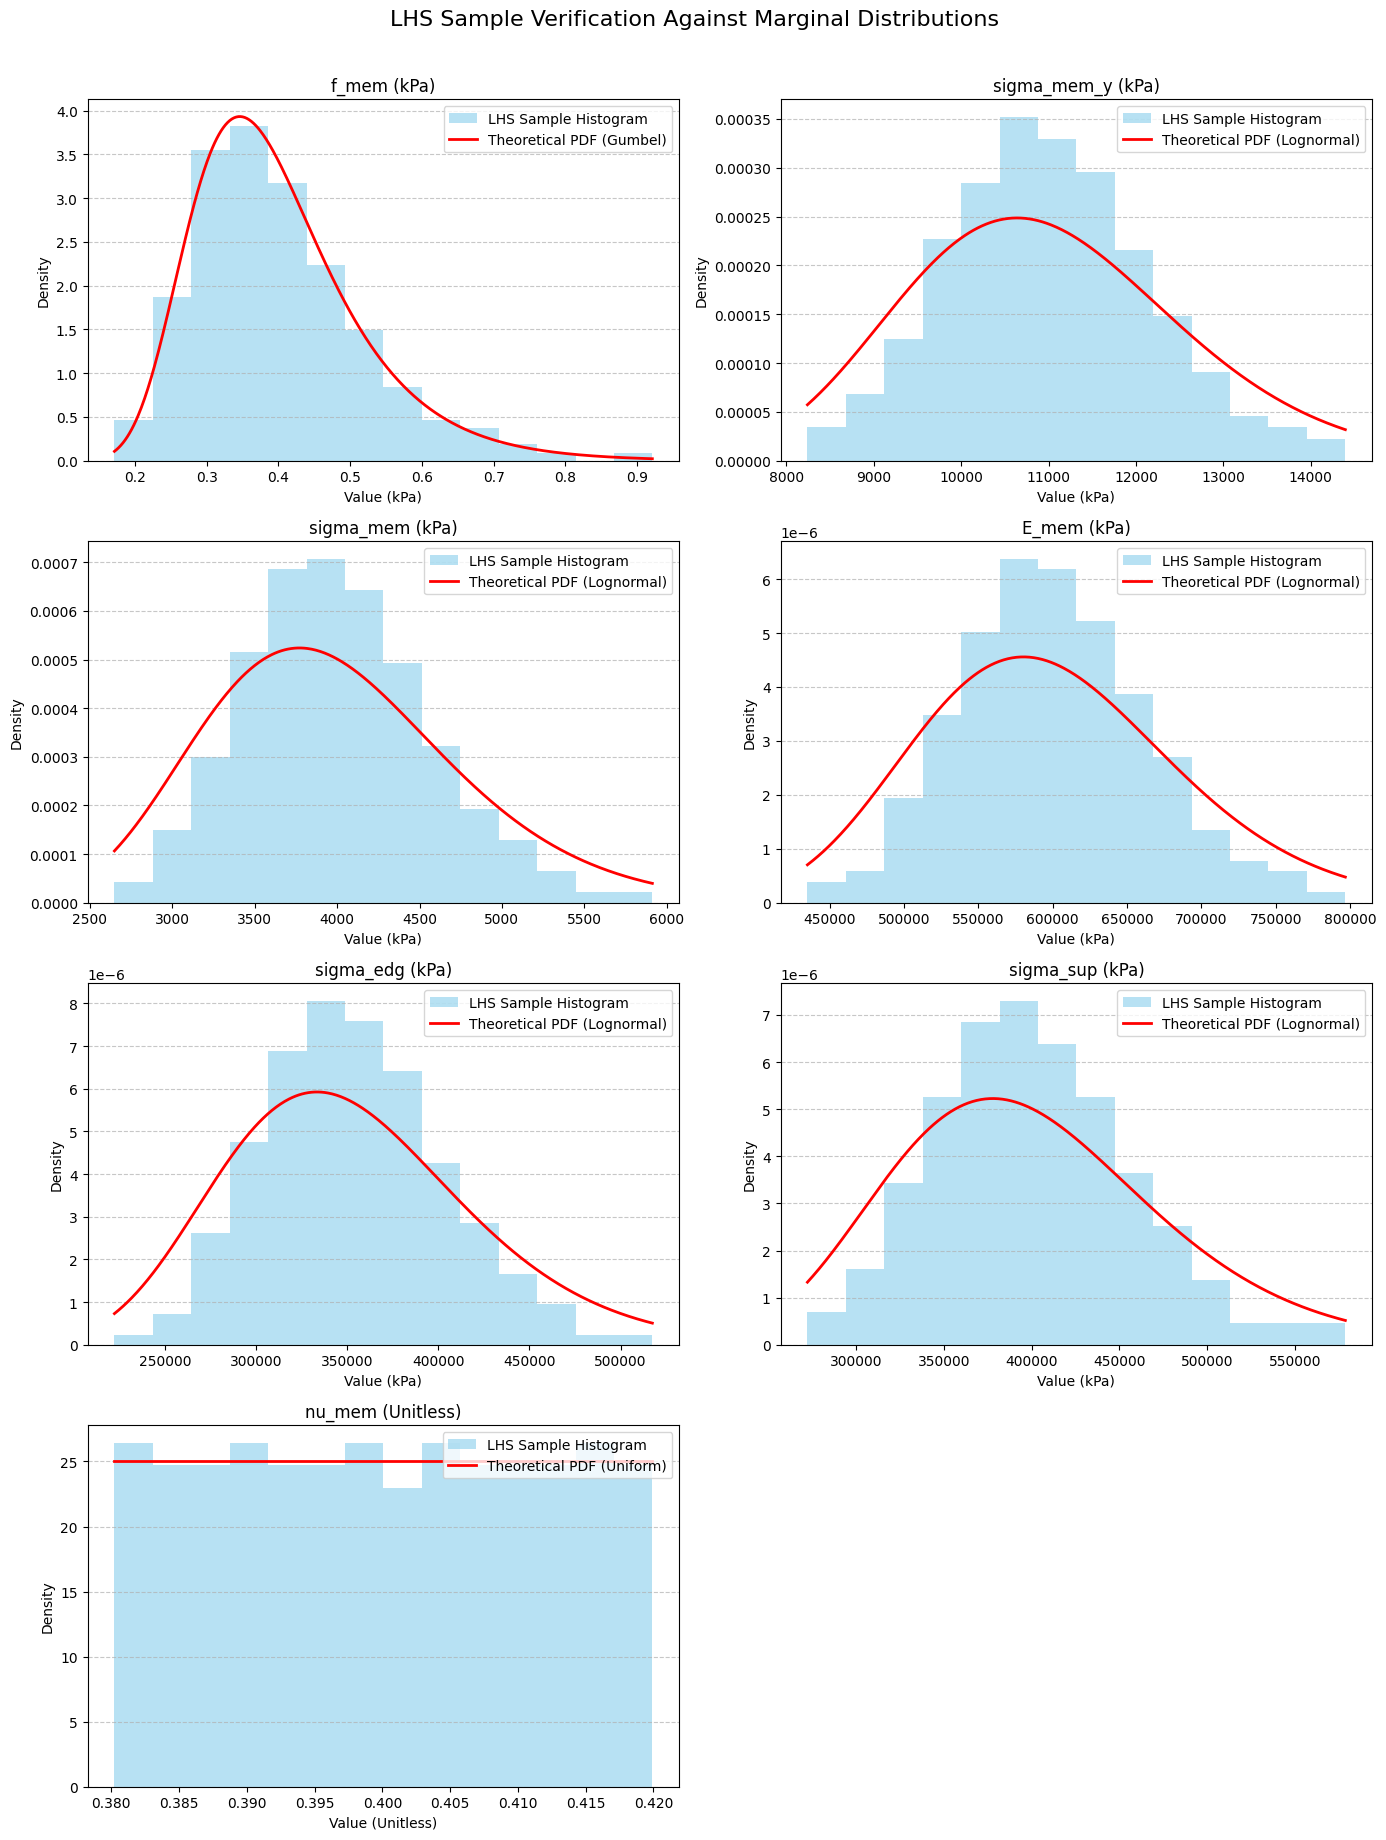


Visualization file 'lhs_verification.py' generated.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gumbel_r, uniform
import math

# --- 1. Load Distribution Parameters ---
# The parameter data is loaded from the uploaded CSV file.
try:
    # Assuming the uploaded file name is used
    param_df = pd.read_csv('specs.csv')
    param_df = param_df.set_index('input')
    variables = param_df.index.tolist()
except FileNotFoundError:
    print("Error: 'specs.csv' not found.")
    exit()

# --- 2. Load Sample Data ---
# Since the user only provided a snippet and did not upload the 'design.csv'
# file, we will construct the sample data from the provided snippet for demonstration.
# In a real scenario, you would load the full CSV: df = pd.read_csv('design.csv')

# Reconstructing the data from the user's snippet (only 5 rows provided)
# For the plot to look representative, the full N=200 sample is required. 
# We'll use the provided 5 rows for column names and exit if the full file isn't found.

sample_data = {
    'sigma_mem_y': [11089.186440, 11186.673726, 10957.281092, 11077.986113, 10938.532254],
    'f_mem': [0.225121, 0.632207, 0.403386, 0.260881, 0.424181],
    'sigma_mem': [4069.602649, 3966.710294, 4020.986056, 4063.978502, 4143.724587],
    'E_mem': [600251.770406, 599009.236395, 609879.303669, 602545.892735, 596697.621175],
    'nu_mem': [0.385561, 0.414256, 0.403823, 0.390832, 0.397937],
    'sigma_edg': [357763.741698, 354436.900076, 338179.023463, 348846.185392, 358803.623316],
    'sigma_sup': [400907.145521, 398646.099011, 391679.666409, 389074.692423, 413058.390089]
}
# IMPORTANT: This assumes a file named 'design.csv' exists with the full dataset.
# If not, the code will fail with an error for demonstration purposes.
try:
    sample_df = pd.read_csv('design_1.csv') 
    print(f"Loaded full LHS sample with {len(sample_df)} points.")
except FileNotFoundError:
    print("\n--- WARNING: Using only the 5 sample points provided in the query snippet. ---")
    print("The plot will be inaccurate. Please ensure your 'design.csv' file is available.")
    sample_df = pd.DataFrame(sample_data)


# --- 3. Parameter Conversion and Plotting Function ---
def get_dist_params(m, sd, dist_name):
    """Calculates SciPy parameters (s, loc, scale) from mean (m) and std dev (sd)."""
    if dist_name == 'Lognormal':
        # SciPy lognorm uses s=sigma, scale=exp(mu)
        sigma = np.sqrt(np.log(1 + (sd / m)**2))
        mu = np.log(m) - sigma**2 / 2
        return lognorm, {'s': sigma, 'scale': np.exp(mu)}
    
    elif dist_name == 'Gumbel':
        # SciPy gumbel_r uses loc=mu, scale=beta
        gamma = 0.5772156649  # Euler–Mascheroni constant
        beta = sd * np.sqrt(6) / np.pi
        mu = m - gamma * beta
        return gumbel_r, {'loc': mu, 'scale': beta}
    
    elif dist_name == 'Uniform':
        # SciPy uniform uses loc=start (a), scale=width (b-a)
        width = sd * 2 * np.sqrt(3)
        a = m - width / 2
        return uniform, {'loc': a, 'scale': width}
    
    return None, {}

# --- 4. Visualization ---
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Get parameters from the parameter table
    row = param_df.loc[var]
    dist_name = row['dist']
    mean_val = row['mean']
    std_val = row['sd']
    unit = row['unit']
    
    # Get sample data for the variable
    sample_values = sample_df[var].values
    
    # Calculate SciPy distribution parameters
    Dist, params = get_dist_params(mean_val, std_val, dist_name)
    
    if Dist:
        # 1. Plot Sample Histogram
        # Using a number of bins appropriate for LHS (often sqrt(N) or N/10)
        n_bins = max(10, int(np.sqrt(len(sample_values))))
        ax.hist(sample_values, bins=n_bins, density=True, alpha=0.6, 
                color='skyblue', label='LHS Sample Histogram')
        
        # 2. Plot Theoretical PDF
        x_min, x_max = sample_values.min(), sample_values.max()
        x_range = np.linspace(x_min, x_max, 500)
        
        # Ensure the PDF uses the correct parameters
        pdf_curve = Dist.pdf(x_range, **params)
        ax.plot(x_range, pdf_curve, 'r-', linewidth=2, label=f'Theoretical PDF ({dist_name})')
        
        # Aesthetics
        ax.set_title(f'{var} ({unit if pd.notna(unit) else "Unitless"})', fontsize=12)
        ax.set_xlabel(f'Value ({unit if pd.notna(unit) else "Unitless"})')
        ax.set_ylabel('Density')
        ax.legend(loc='upper right')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide the unused subplot
if len(variables) < len(axes):
    axes[len(variables)].axis('off')

fig.suptitle('LHS Sample Verification Against Marginal Distributions', fontsize=16, y=1.02)
fig.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

print("\nVisualization file 'lhs_verification.py' generated.")

In [5]:
def lognormal_params(mean, std):
    mu = np.log((mean**2) / np.sqrt(std**2 + mean**2))
    sigma_sq = np.log(1 + (std**2) / (mean**2))
    return mu, sigma_sq, sigma_sq**0.5

lognormal_params(11000,1650)

(np.float64(9.294525247313098),
 np.float64(0.022250608934819723),
 np.float64(0.14916638004195087))

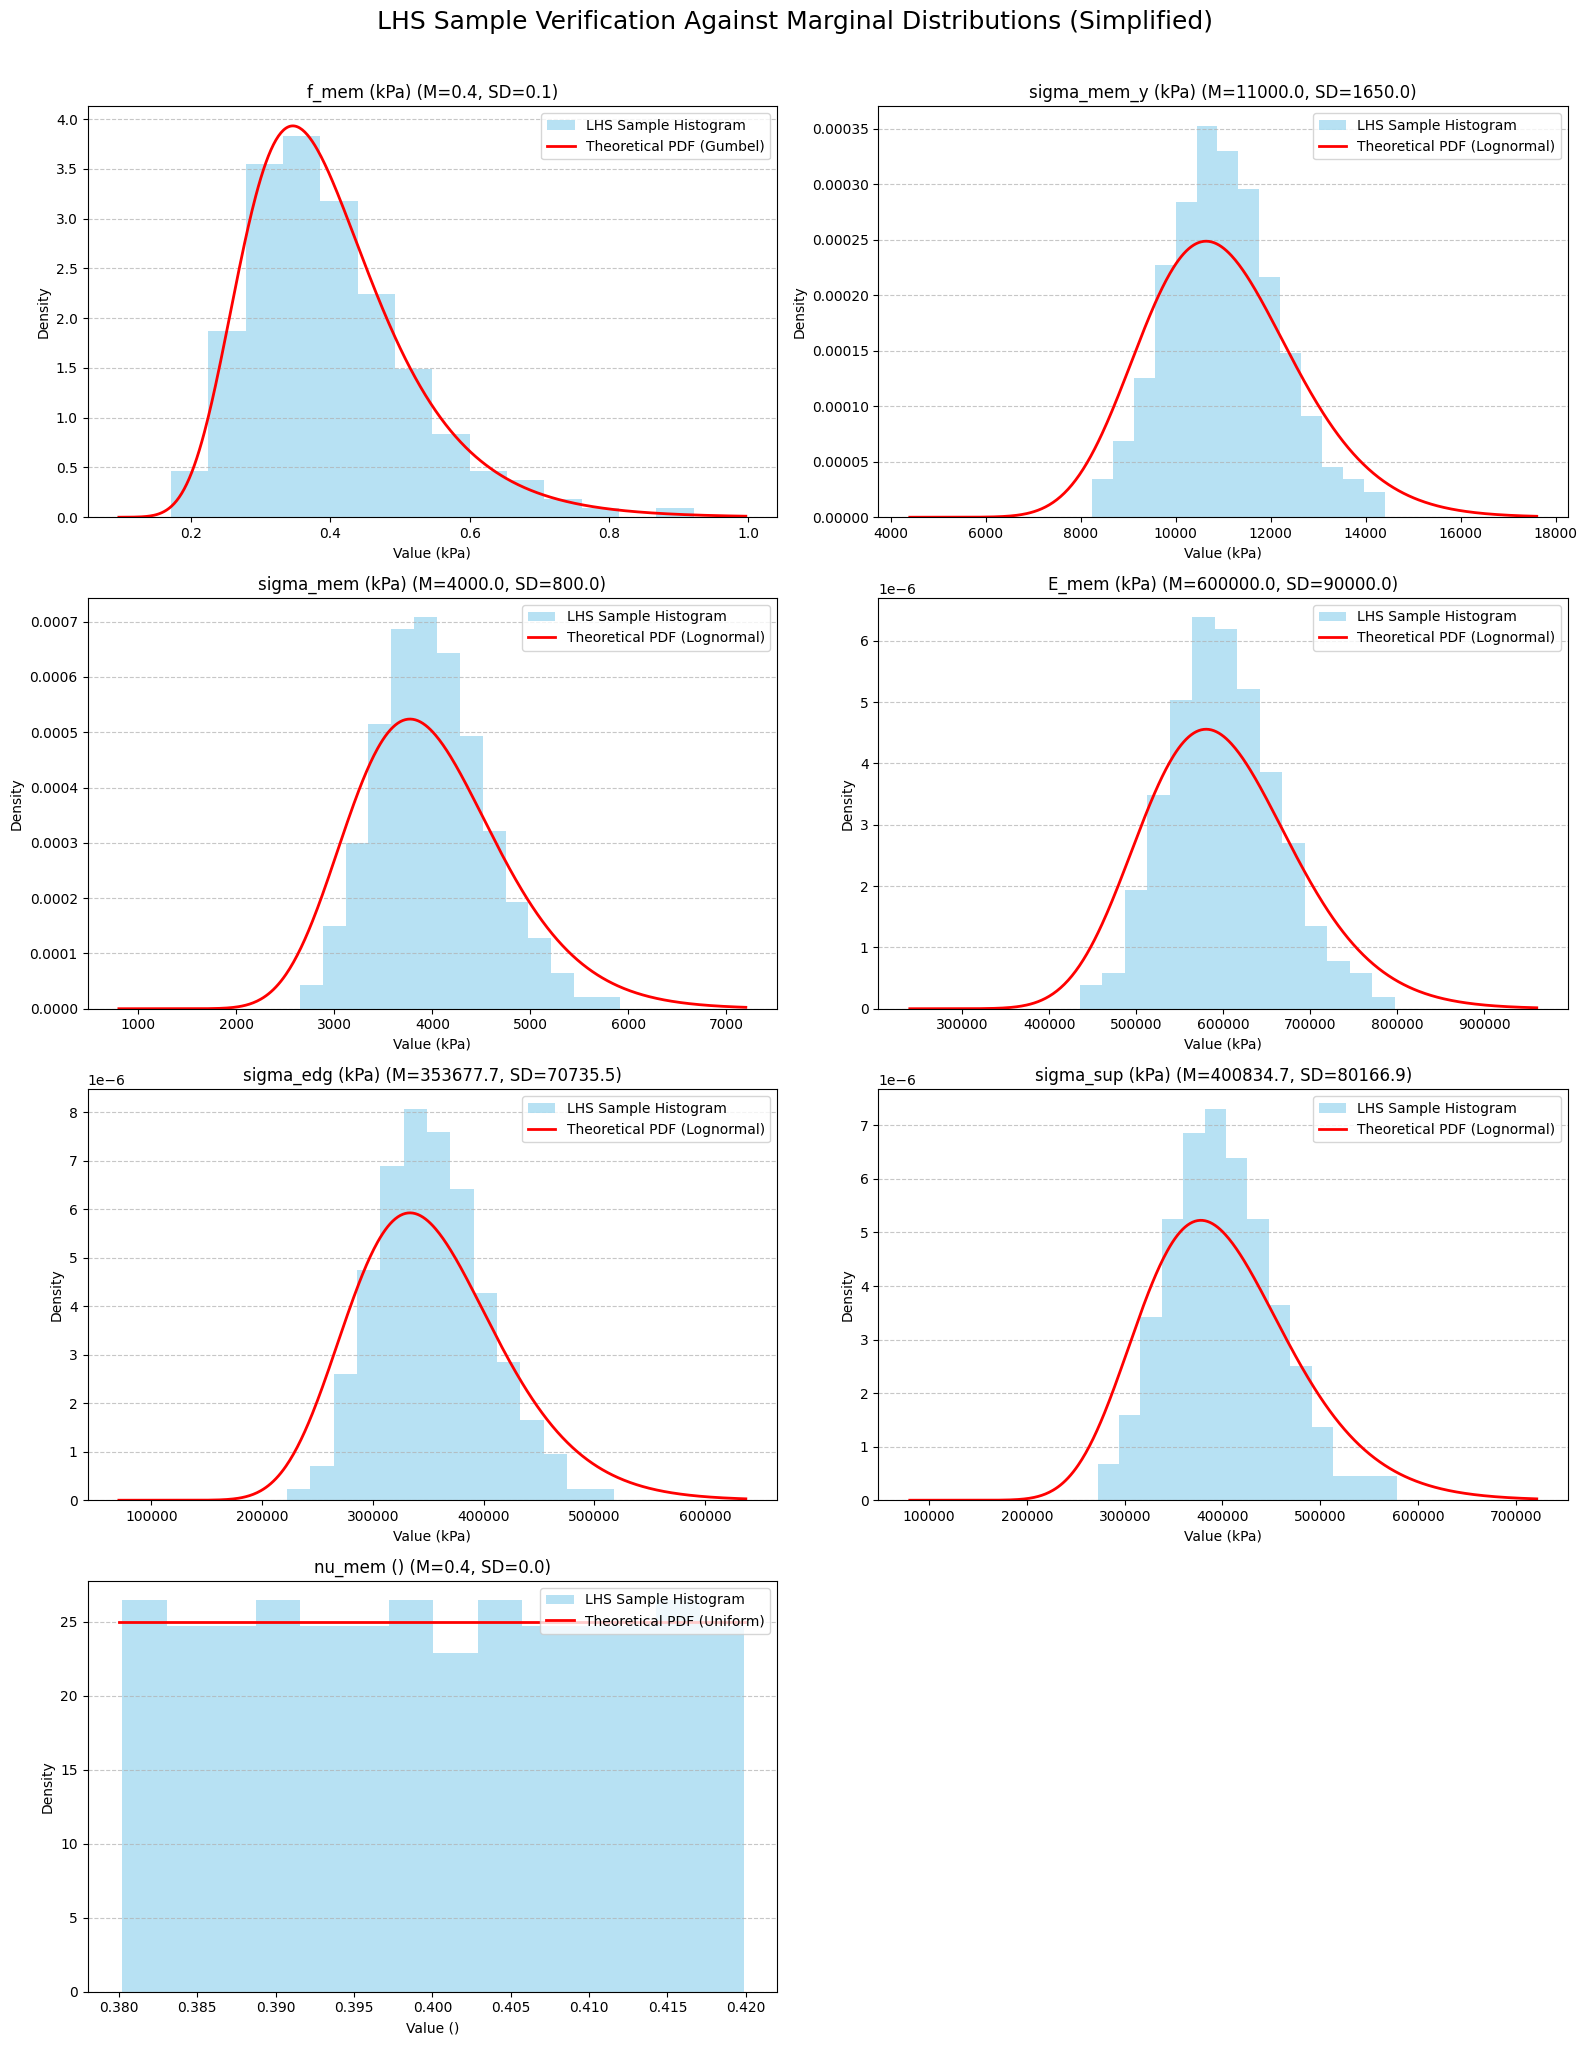


Visualization file 'lhs_verification_simple.py' generated with fixed Lognormal plotting range.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, gumbel_r, uniform
import math

# --- 1. Define Distribution Parameters (from user's query) ---
# Hardcoded parameters for simplicity, eliminating dependency on the separate CSV file for params.
PARAMS_DATA = {
    'input': ['f_mem', 'sigma_mem_y', 'sigma_mem', 'E_mem', 'sigma_edg', 'sigma_sup', 'nu_mem'],
    'unit': ['kPa', 'kPa', 'kPa', 'kPa', 'kPa', 'kPa', ''],
    'dist': ['Gumbel', 'Lognormal', 'Lognormal', 'Lognormal', 'Lognormal', 'Lognormal', 'Uniform'],
    'mean': [0.4, 11000, 4000, 600000, 353677.6513, 400834.6715, 0.4],
    'sd': [0.12, 1650, 800, 90000, 70735.53026, 80166.9343, 0.01154700538]
}
param_df = pd.DataFrame(PARAMS_DATA).set_index('input')
variables = param_df.index.tolist()

sample_df = pd.read_csv('design_1.csv')


# --- 3. Parameter Conversion and Plotting Function ---
def get_dist_params(m, sd, dist_name):
    """Calculates SciPy parameters (s, loc, scale) from mean (m) and std dev (sd)."""
    if dist_name == 'Lognormal':
        # SciPy lognorm uses s=sigma, scale=exp(mu)
        sigma = np.sqrt(np.log(1 + (sd / m)**2))
        mu = np.log(m) - sigma**2 / 2
        return lognorm, {'s': sigma, 'scale': np.exp(mu)}, mu, sigma
    
    elif dist_name == 'Gumbel':
        # SciPy gumbel_r uses loc=mu, scale=beta
        gamma = 0.5772156649  # Euler–Mascheroni constant
        beta = sd * np.sqrt(6) / np.pi
        mu = m - gamma * beta
        return gumbel_r, {'loc': mu, 'scale': beta}, mu, beta # Return mu/beta for plotting range
    
    elif dist_name == 'Uniform':
        # SciPy uniform uses loc=start (a), scale=width (b-a)
        width = sd * 2 * np.sqrt(3)
        a = m - width / 2
        return uniform, {'loc': a, 'scale': width}, a, width # Return a/width for plotting range
    
    return None, {}, 0, 0

# --- 4. Visualization ---
# 7 variables, so 4x2 grid is appropriate
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for i, var in enumerate(variables):
    ax = axes[i]
    
    # Get parameters
    row = param_df.loc[var]
    dist_name = row['dist']
    mean_val = row['mean']
    std_val = row['sd']
    unit = row['unit']
    
    # Get sample data
    sample_values = sample_df[var].values
    
    # Calculate SciPy distribution parameters and distribution-specific location/scale parameters
    Dist, params, loc_param, scale_param = get_dist_params(mean_val, std_val, dist_name)
    
    if Dist:
        # 1. Determine a Robust Plotting Range (Fix for Lognormal straight line)
        
        # For Lognormal, the shape and scale can push the peak far from the min sample value.
        # We use a theoretical range around the mean (M) and standard deviation (S)
        
        if dist_name == 'Uniform':
             # For uniform, the range is [loc, loc + scale]
             x_range = np.linspace(params['loc'], params['loc'] + params['scale'], 500)
        elif dist_name == 'Lognormal':
             # Use the range covered by the sample, extended to catch the tail
             x_min_theoretical = max(1e-9, mean_val - 4 * std_val) # Clamp at 0 or near-zero
             x_max_theoretical = mean_val + 4 * std_val
             x_range = np.linspace(x_min_theoretical, x_max_theoretical, 500)
        else: # Default for Gumbel/other
             # Use a generic range around the sample data, which is usually fine for these.
             x_min, x_max = sample_values.min(), sample_values.max()
             x_range = np.linspace(x_min - (x_max - x_min)*0.1, x_max + (x_max - x_min)*0.1, 500)


        # 2. Plot Sample Histogram
        # Using a number of bins appropriate for LHS (often sqrt(N) or N/10)
        n_bins = max(10, int(np.sqrt(len(sample_values))))
        ax.hist(sample_values, bins=n_bins, density=True, alpha=0.6, 
                color='skyblue', label='LHS Sample Histogram')
        
        # 3. Plot Theoretical PDF
        pdf_curve = Dist.pdf(x_range, **params)
        ax.plot(x_range, pdf_curve, 'r-', linewidth=2, label=f'Theoretical PDF ({dist_name})')
        
        # Aesthetics
        ax.set_title(f'{var} ({unit}) (M={mean_val:.1f}, SD={std_val:.1f})', fontsize=12)
        ax.set_xlabel(f'Value ({unit})')
        ax.set_ylabel('Density')
        ax.legend(loc='upper right')
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Hide the unused subplot
if len(variables) < len(axes):
    axes[len(variables)].axis('off')

fig.suptitle('LHS Sample Verification Against Marginal Distributions (Simplified)', fontsize=18, y=1.02)
fig.tight_layout(rect=[0, 0, 1, 1.01])
plt.show()

print("\nVisualization file 'lhs_verification_simple.py' generated with fixed Lognormal plotting range.")

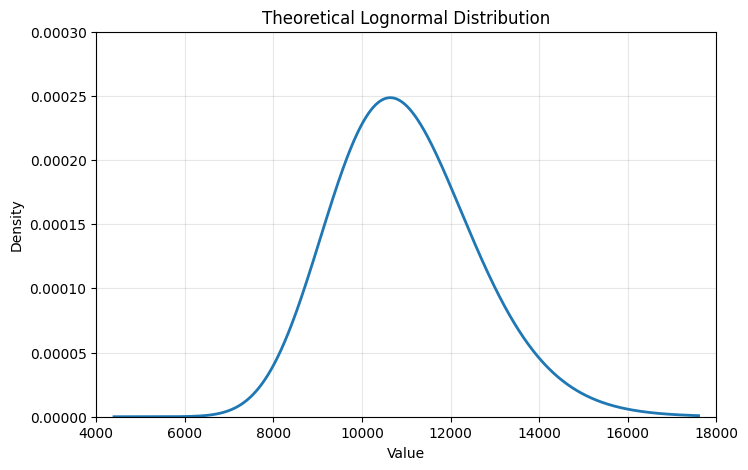

(np.float64(9.294525247313098), np.float64(0.14916638004195087))

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_lognormal_from_mean_sd(mean, sd, num_points=1000):
    """
    Plot the theoretical lognormal PDF given the reported mean and sd 
    of the original (non-log) variable.
    
    Parameters
    ----------
    mean : float
        Reported mean of the variable.
    sd : float
        Reported standard deviation of the variable.
    num_points : int
        Number of points for plotting.
    """

    # Convert to log-space parameters
    sigma2_log = np.log(1 + (sd**2 / mean**2))
    sigma_log = np.sqrt(sigma2_log)
    mu_log = np.log(mean) - sigma2_log / 2

    # Create x-values (3 SDs around mean)
    x_min = max(1e-9, mean - 4*sd)
    x_max = mean + 4*sd
    x = np.linspace(x_min, x_max, num_points)

    # Lognormal PDF
    pdf = lognorm(s=sigma_log, scale=np.exp(mu_log)).pdf(x)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, pdf, linewidth=2)
    plt.title("Theoretical Lognormal Distribution")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.xlim(4000, 18000)
    plt.ylim(0, 0.0003)
    plt.grid(alpha=0.3)
    plt.show()

    return mu_log, sigma_log


plot_lognormal_from_mean_sd(11000, 1650)

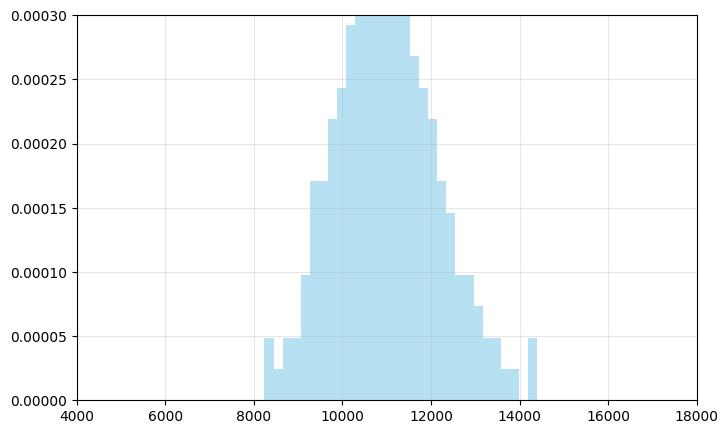

In [16]:
x_min = 4000
x_max = 18000
x = np.linspace(x_min, x_max, 200)

df = pd.read_csv('design_1.csv')

plt.figure(figsize=(8, 5))
# plt.plot(x, sample_df['sigma_mem_y'], kind='hist', bins=30, density=True, alpha=0.6, color='skyblue')
plt.hist(
    sample_df['sigma_mem_y'],
    bins=30,
    density=True,
    alpha=0.6,
    color='skyblue'
)
plt.xlim(4000, 18000)
plt.ylim(0, 0.0003)
plt.grid(alpha=0.3)
plt.show()

# sample_df['sigma_mem_y'].plot(kind='hist', bins=30, density=True, alpha=0.6, color='skyblue')